In [9]:
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
import pandas as pd
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ["Targets"]
df = pd.concat([X,y],axis=1)
df.groupby("Targets").mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Targets,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


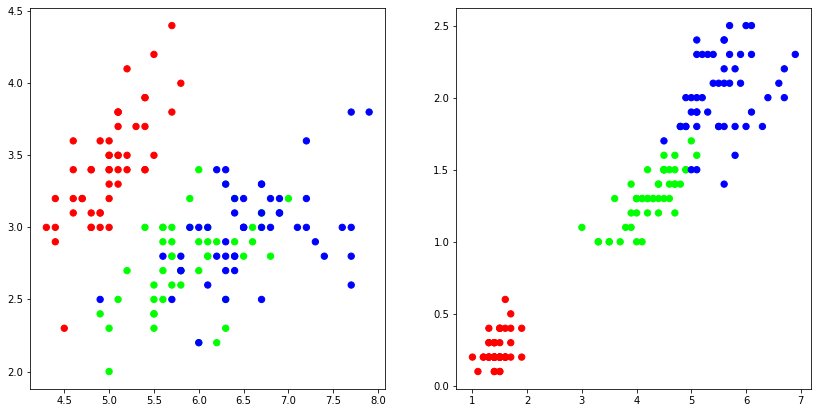

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'blue'])

plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.show()

In [12]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

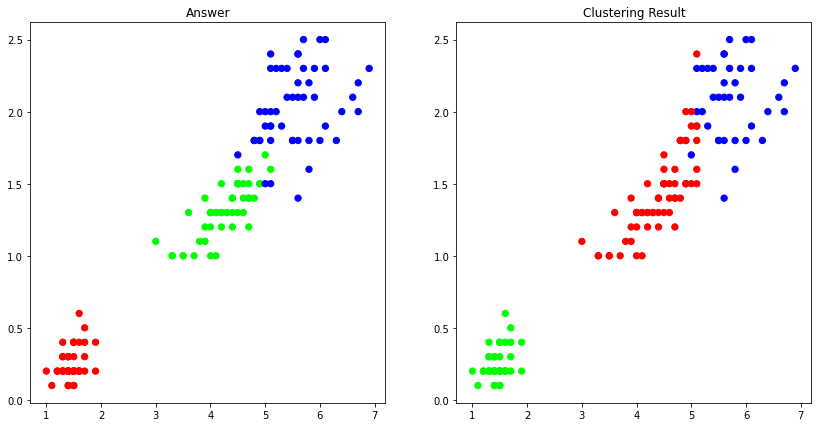

In [14]:
plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'blue'])

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title("Answer")
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title("Clustering Result")
plt.show()

In [15]:
# 색깔이 잘못 나온거 라벨 넘버를 바꿈으로써 해결하기
pred = np.choose(model.labels_, [1,0,2]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


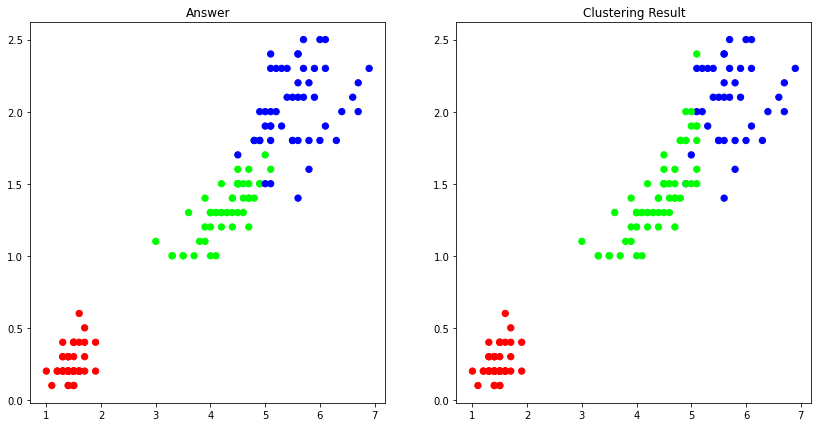

In [16]:
plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'blue'])

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title("Answer")
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)
plt.title("Clustering Result")
plt.show()

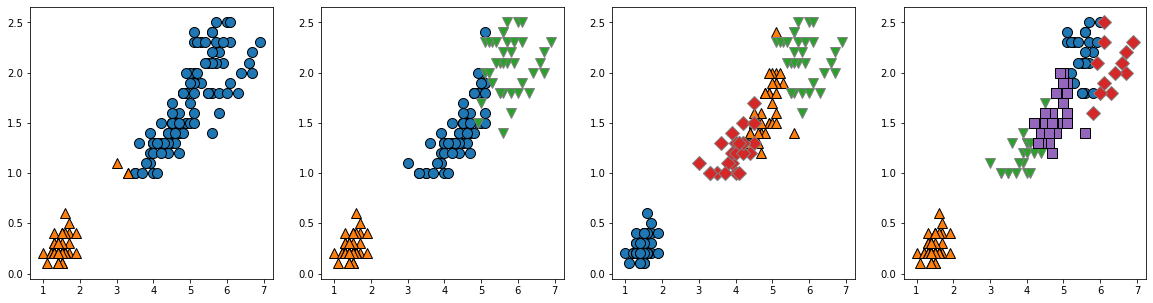

In [17]:
from matplotlib import pyplot as plt
import mglearn

fig, axes = plt.subplots(1, 4, figsize=(20,5))

idx = 0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_

    mglearn.discrete_scatter(X["Petal_Length"], X["Petal_Width"], lbls, ax=axes[idx]) # 2차원 그래프라서 일조량과 온도만 씀
    idx+=1

In [ ]:
# k-means++

In [18]:
from sklearn.datasets import load_digits

digits = load_digits()

In [19]:
from sklearn.cluster import KMeans

# 기본 알고리즘이 k-means++
# 랜덤으로 하나를 잡고 이후에는 이전의 중심좌표와 거리를 계산하여 되도록 멀리 떨어진 좌표를 선택
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_) # 중심좌표...인데 이미지 파일이라서 좌표가 이렇게 나옴

[[ 0.00000000e+00  1.11022302e-16  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   1.73472348e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   8.67361738e-19  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  0.00000000e+00
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -8.32667268e-17
  -2.16840434e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

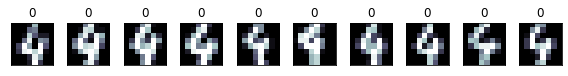

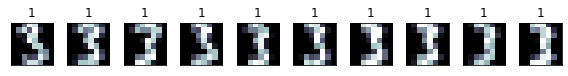

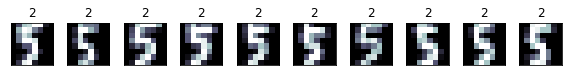

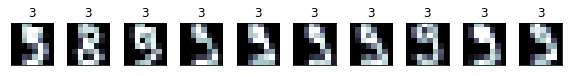

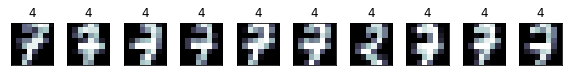

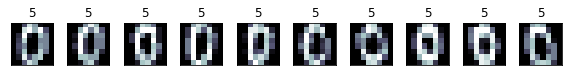

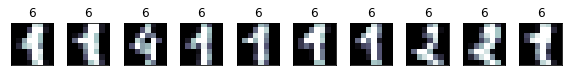

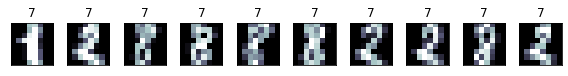

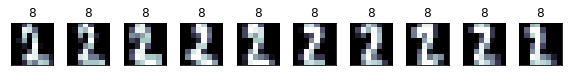

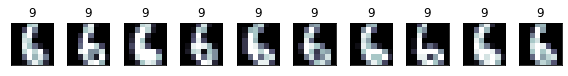

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_digits(images, labels):
    f = plt.figure(figsize=(8,2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i+1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)
# 의미 없다 confusion_matrix...

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]])

In [22]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(digits.data, y_pred)

0.18251916424600556

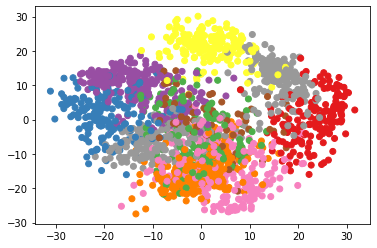

In [23]:
from sklearn.decomposition import PCA

# 군집화 결과를 주성분 분석을 통해 그린 그래프
# 이미지 분석이기 때문에 차원 축소

pca = PCA(n_components=2) # 차원 축소를 위한 주성분 분석 함수 PCA(). 분산이 제일 큰 변수 2개만 뽑으라는 뜻
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

In [ ]:
# 미니배치 MiniBatch

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [2]:
from sklearn.cluster import KMeans

# 데이터가 많을 때 학습 시간이 오래 걸림
model1 = KMeans(n_clusters=3).fit(X)

In [3]:
from sklearn.cluster import MiniBatchKMeans

# batch_size : 1000개씩 n세트를 만들어서 돌리는 것. 부분집합 같은 느낌. 너무 작게 설정하면 경고 뜸
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

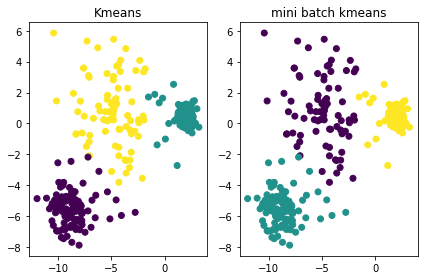

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()

In [ ]:
# minibatch(face)

(427, 640, 3)


([], [])

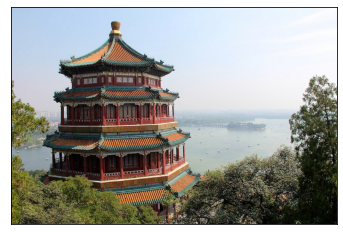

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image

one_image = load_sample_image("china.jpg")
print(one_image.shape)
plt.imshow(one_image, cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

(161048, 100, 150, 3)


([], [])

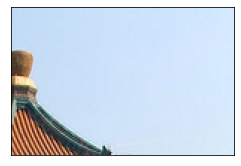

In [7]:
# 이미지 파일은 용량이 아주 크기 때문에 extract_patches_2d로 부분 이미지로 나눠서 학습하는 게 빠름
patches = image.extract_patches_2d(one_image, (100,150))
print(patches.shape)
plt.figure(figsize=(4,4))
plt.imshow(patches[200], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())

In [8]:
import time
import numpy as np
from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20,20) # 부분 이미지의 사이즈 설정

buffer = []
t0 = time.time()

index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1)) # 2차원 형태로 바꿈
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            # 표준화 과정
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data) # 부분 학습
            buffer = []
        if index % 100 == 0:
            print('부분학습 : %4i / %i' % (index, 6 * len(faces.images)))

dt = time.time() - t0
print('실행시간: ',dt)

[MiniBatchKMeans] Reassigning 6 cluster centers.
[MiniBatchKMeans] Reassigning 3 cluster centers.
부분학습 :  100 / 2400
[MiniBatchKMeans] Reassigning 3 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
부분학습 :  200 / 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
[MiniBatchKMeans] Reassigning 1 cluster centers.
부분학습 :  300 / 2400
부분학습 :  400 / 2400
부분학습 :  500 / 2400
부분학습 :  600 / 2400
부분학습 :  700 / 2400
부분학습 :  800 / 2400
부분학습 :  900 / 2400
부분학습 : 1000 / 2400
부분학습 : 1100 / 2400
부분학습 : 1200 / 2400
부분학습 : 1300 / 2400
부분학습 : 1400 / 2400
부분학습 : 1500 / 2400
부분학습 : 1600 / 2400
부분학습 : 1700 / 2400
부분학습 : 1800 / 2400
부분학습 : 1900 / 2400
부분학습 : 2000 / 2400
부분학습 : 2100 / 2400
부분학습 : 2200 / 2400
부분학습 : 2300 / 2400
부분학습 : 2400 / 2400
실행시간:  3.5082240104675293


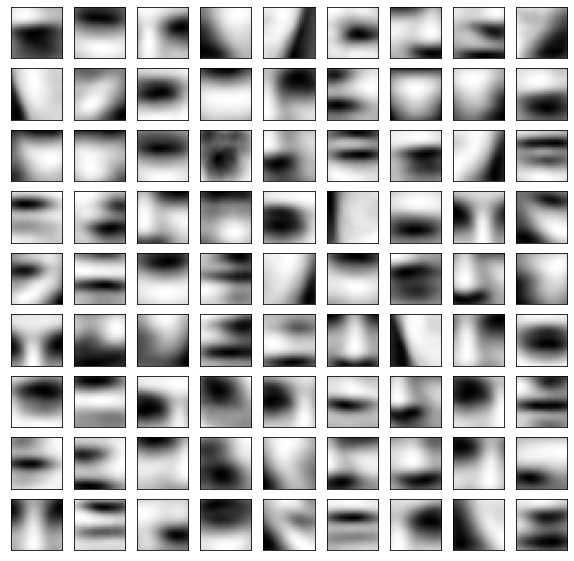

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9,9,i+1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show()